(data-extraction)=
# Getting Data


               **    #INTRODUCTION**
in this project we can try to code and test some of the data extracting techniques from a different resource such as obtaing data  from the internets,and by using API, from documents, and elsewhere. for this types of task first we have to install  pandas-datareader and BeautifulSoup package.



                **importing library**
the first steps is import the different library dependancy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import textwrap

In [2]:
# Set max rows displayed for readability
pd.set_option("display.max_rows", 6)
# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)

**1. Extracting data from files on the internet**

 it's easy to read data from the internet once you have the url and file type. Here, for instance, is an example that reads in the 'contnent' dataset for african country (we'll only grab the first 10 rows by 2 columons):

In [3]:
pd.read_csv(
    "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv", nrows=10
)

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
...,...,...
7,Cape Verde,AFRICA
8,Central African Republic,AFRICA
9,Chad,AFRICA


**2. Obtaining data using APIs**

Using an API (application programming interface) is another way to draw down information from the interweb. Their just a way for one tool, say Python, to speak to another tool, say a server, and usefully exchange information. The classic use case would be to post a request for data that fits a certain query via an API and to get a download of that data back in return. 
To see this, let's directly use an API to get some time series data. We will make the call out to the internet using the **requests** package.
 JSON is not good for analysis, so we'll use **pandas** to put the data into shape.

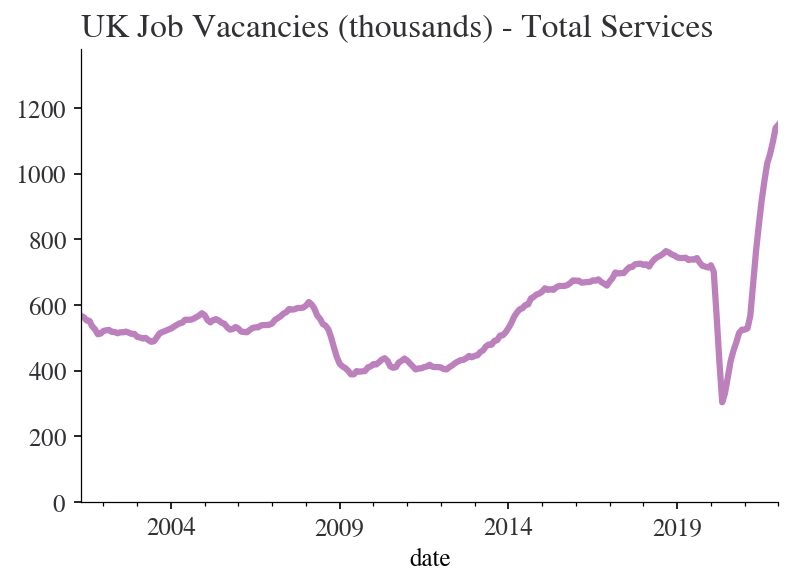

In [4]:
import requests

url = "https://api.ons.gov.uk/timeseries/JP9Z/dataset/UNEM/data"

# Get the data from the ONS API:
json_data = requests.get(url).json()

# Prep the data for a quick plot
title = json_data["description"]["title"]
df = (
    pd.DataFrame(pd.json_normalize(json_data["months"]))
    .assign(
        date=lambda x: pd.to_datetime(x["date"]),
        value=lambda x: pd.to_numeric(x["value"]),
    )
    .set_index("date")
)

df["value"].plot(title=title, ylim=(0, df["value"].max() * 1.2), lw=3.0);

We've talked about *reading* APIs. You can also create your own to serve up data, models, whatever you like! This is an advanced topic and we won't cover it; but if you do need to, the simplest way is to use [Fast API](https://fastapi.tiangolo.com/). You can find some short video tutorials for Fast API [here](https://calmcode.io/fastapi/hello-world.html).

### Pandas Datareader: an easier way to interact with (some) APIs

Although it didn't take much code to get the ONS data, it would be even better if it was just a single line, wouldn't it? Fortunately there are some packages out there that make this easy, but it does depend on the API (and APIs come and go over time).

By far the most comprehensive library for accessing extra APIs is [**pandas-datareader**](https://pandas-datareader.readthedocs.io/en/latest/), which provides convenient access to:

- FRED
- Quandl
- World Bank
- OECD
- Eurostat

and more.

Let's see an example using FRED (the Federal Reserve Bank of St. Louis' economic data library). This time, let's look at the UK unemployment rate:

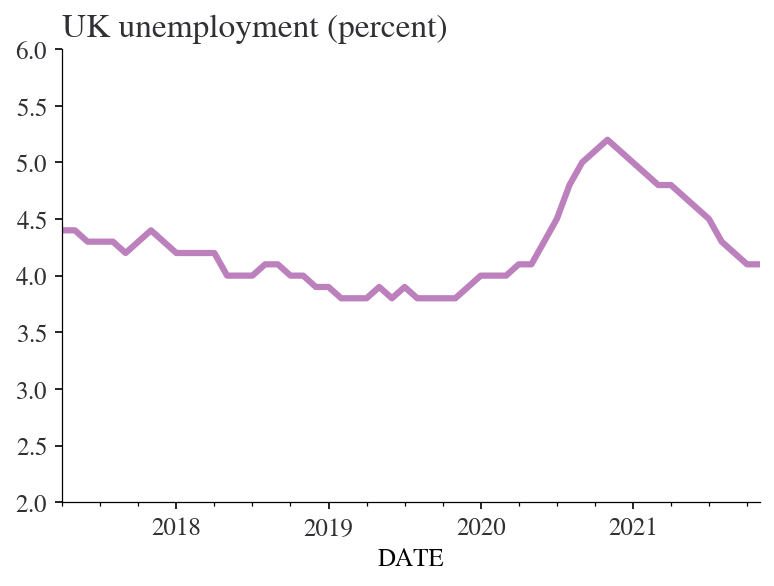

In [5]:
import pandas_datareader.data as web

df_u = web.DataReader("LRHUTTTTGBM156S", "fred")

df_u.plot(title="UK unemployment (percent)", legend=False, ylim=(2, 6), lw=3.0);

And, because it's also a really useful one, let's also see how to use **pandas-datareader** to access World Bank data.

In [6]:
# World Bank CO2 emissions (metric tons per capita)
# https://data.worldbank.org/indicator/EN.ATM.CO2E.PC
# World Bank pop
# https://data.worldbank.org/indicator/SP.POP.TOTL
# country and region codes at http://api.worldbank.org/v2/country
from pandas_datareader import wb
df = wb.download(
    indicator="EN.ATM.CO2E.PC",
    country=["US", "CHN", "IND", "Z4", "Z7"],
    start=2017,
    end=2017,
)
# remove country as index for ease of plotting with seaborn
df = df.reset_index()
# wrap long country names
df["country"] = df["country"].apply(lambda x: textwrap.fill(x, 10))
# order based on size
df = df.sort_values("EN.ATM.CO2E.PC")
df.head()

/usr/local/lib/python3.7/dist-packages/pandas_datareader/wb.py:593: UserWarning: Non-standard ISO country codes: Z4, Z7
  "Non-standard ISO " "country codes: %s" % tmp, UserWarning


,country,year,EN.ATM.CO2E.PC
3,India,2017,1.719190
1,East Asia\n& Pacific,2017,6.210897
2,Europe &\nCentral\nAsia,2017,6.722144
0,China,2017,7.174948
4,United\nStates,2017,14.805882


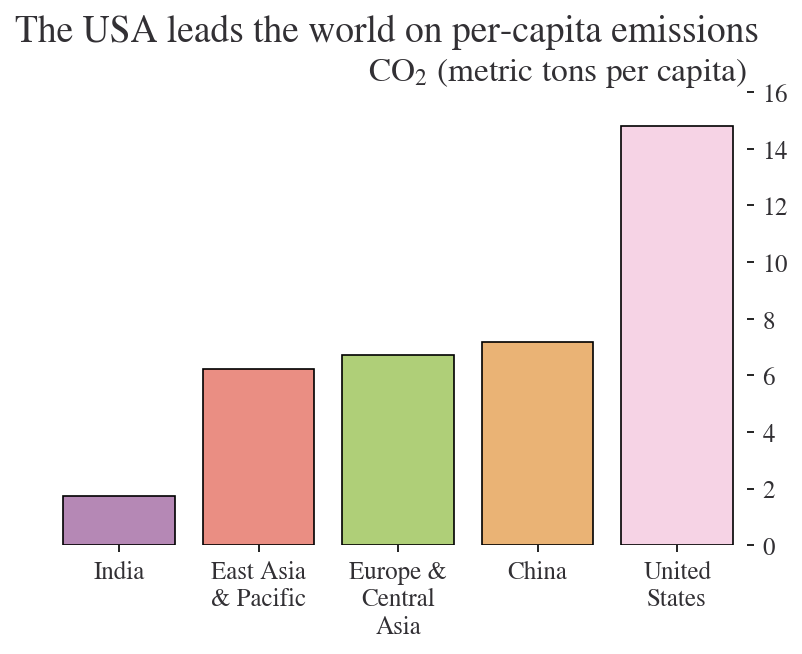

In [7]:
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(x="country", y="EN.ATM.CO2E.PC", data=df.reset_index(), ax=ax)
ax.set_title(r"CO$_2$ (metric tons per capita)", loc="right")
plt.suptitle("The USA leads the world on per-capita emissions", y=1.01)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_ylabel("")
ax.set_xlabel("")
ax.yaxis.tick_right()
plt.show()

This gives us the table neatly loaded into a **pandas** dataframe ready for further use.

              **  3. Extracting data from PDFs**
it may be needed extract data from PDF file either text , table or it may be image

     **3.1 Extracting images and text from PDFs**

We'll use [**pdftotext**](https://github.com/jalan/pdftotext) to get text out of the same PDF.

In [ ]:
import pdftotext
from pathlib import Path

# Download the pdf_with_table.pdf file from
# https://github.com/aeturrell/coding-for-economists/blob/main/data/pdf_with_table.pdf
# and put it in a subfolder called data before running the next line

# Load the PDF
with open(Path("data/pdf_with_table.pdf"), "rb") as f:
    pdf = pdftotext.PDF(f)

# Read all the text into one string; print a chunk of the string
print("\n\n".join(pdf)[:220])

Other options for extracting information from PDFs include [**pdfminer**](https://pdfminersix.readthedocs.io) (which can also extract images) and [borb](https://github.com/jorisschellekens/borb) (though be careful of its licence if you're using it for commercial purposes).

### Tables

The single best solution to grab tables is probably [**camelot**](https://camelot-py.readthedocs.io/en/master/index.html). Note that it does need you to have Ghostscript installed on your computer; you can find more information about the dependencies [here](https://camelot-py.readthedocs.io/en/master/user/install.html). It only works with text-based PDFs and not scanned documents: basically, if you can click and drag to select text in your table in a PDF viewer, then your PDF is text-based. In that case, **camelot** is able to sift through the contents and grab any tables and then pass them back as csvs or even **pandas** dataframes.

At the time of writing, **camelot** had some versioning issues related to a dependency on an outdated version of **sqlalchemy**. You may need to install it in a separate virtual environment to use it.

Here's a small example that assumes you have a pdf with a table in stored in a local directory:

```python
import camelot
# Grab the pdf
tables = camelot.read_pdf(os.path.join('data', 'pdf_with_table.pdf'))
```

To extract any of the $n$ tables that are retrieved into a pandas dataframe individually, use `tables[0].df`. 

Note that **camelot** is not perfect--so it can produce a report on how it did when it tried to extract each table, which includes an accuracy score. This is found using, for example, `tables[0].parsing_report`.


## Text extraction

Not everything is a PDF file! If you want to get the text out of .doc, .docx, .epub, .gif, .json, .jpg, *.mp3*, .odt, .pptx, .rtf, .xlsx, .xls and, actually, .pdf too, then **textract** is for you. Mostly, it's a wrapper around a ton of other libraries. The upside is that getting the text out should be as easy as calling

```python
import textract
text = textract.process(Path('path/to/file.extension'))
```

The downside is that it requires that some other (non-Python) libraries be installed and it doesn't (yet) work on Windows.